# Packages

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import projectfunctions as pf
import numpy as np

# Read Performance Data

In [2]:
heap_id = pf.read_list('heapsort_id')
heap_mass = pf.read_list('heapsort_mass')
heap_name = pf.read_list('heapsort_name')
heap_reclat = pf.read_list('heapsort_reclat')
heap_reclong = pf.read_list('heapsort_reclong')
heap_year = pf.read_list('heapsort_year')

merge_id = pf.read_list('mergesort_id')
merge_mass = pf.read_list('mergesort_mass')
merge_name = pf.read_list('mergesort_name')
merge_reclat = pf.read_list('mergesort_reclat')
merge_reclong = pf.read_list('mergesort_reclong')
merge_year = pf.read_list('mergesort_year')

quick_id = pf.read_list('quicksort_id')
quick_mass = pf.read_list('quicksort_mass')
quick_name = pf.read_list('quicksort_name')
quick_reclat = pf.read_list('quicksort_reclat')
quick_reclong = pf.read_list('quicksort_reclong')
quick_year = pf.read_list('quicksort_year')

stable_id = pf.read_list('stablesort_id')
stable_mass = pf.read_list('stablesort_mass')
stable_name = pf.read_list('stablesort_name')
stable_reclat = pf.read_list('stablesort_reclat')
stable_reclong = pf.read_list('stablesort_reclong')
stable_year = pf.read_list('stablesort_year')

## QQ Plot

Looking just at heap sort values, we can see that the distributions vary considerably and are not normally distributed.

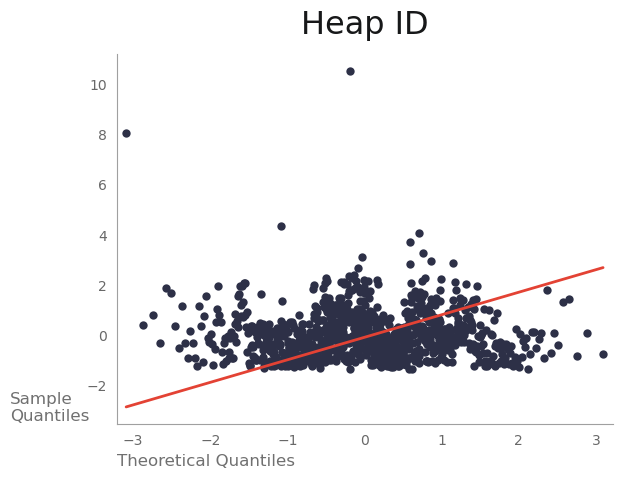

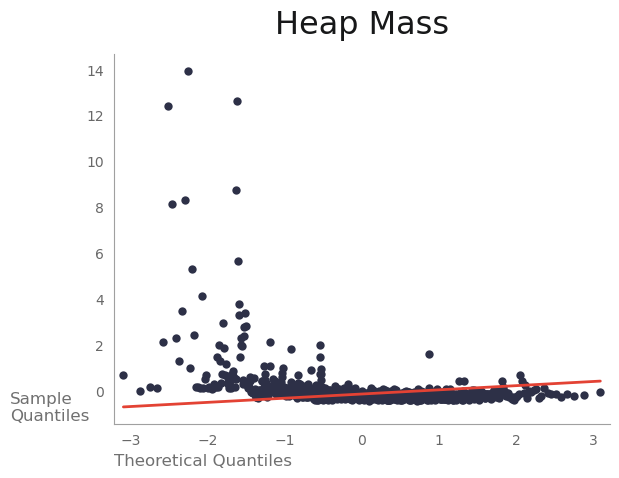

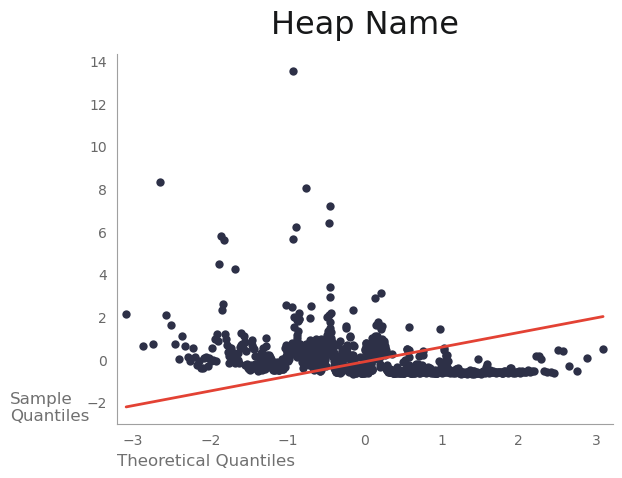

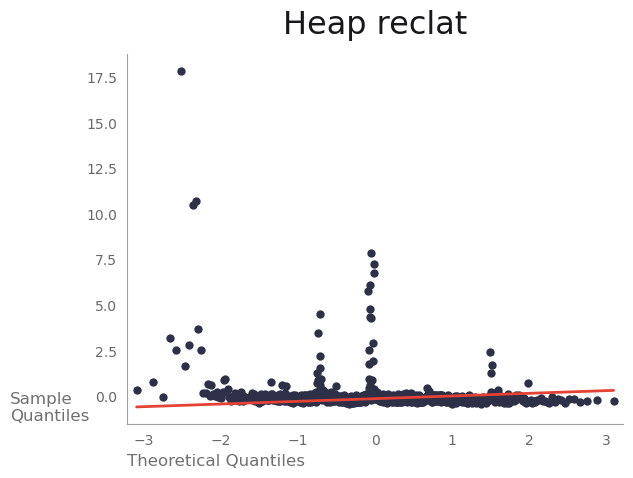

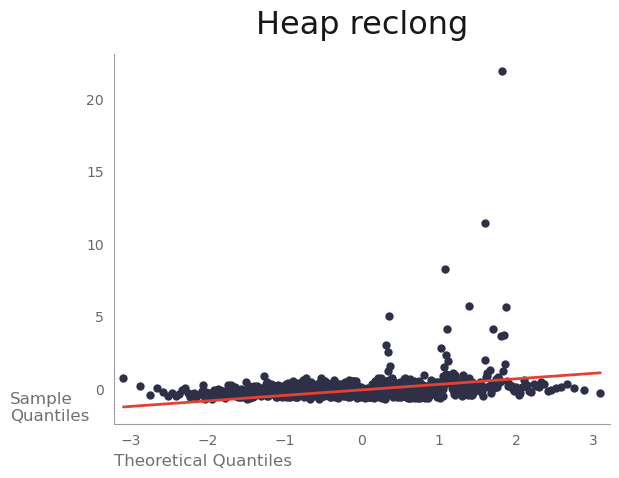

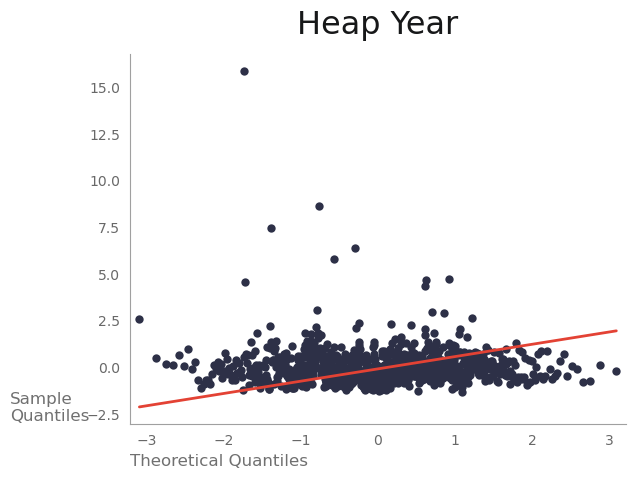

In [3]:
pf.qqplot(heap_id, 'Heap ID')
pf.qqplot(heap_mass, 'Heap Mass')
pf.qqplot(heap_name, 'Heap Name')
pf.qqplot(heap_reclat, 'Heap reclat')
pf.qqplot(heap_reclong, 'Heap reclong')
pf.qqplot(heap_year, 'Heap Year')

# Stats Prep

In [45]:
id_sum = pd.concat([heap_id, merge_id, quick_id, stable_id])
mass_sum = pd.concat([heap_mass, merge_mass, quick_mass, stable_mass])
name_sum = pd.concat([heap_name, merge_name, quick_name, stable_name])
reclat_sum = pd.concat([heap_reclat, merge_reclat, quick_reclat, stable_reclat])
reclong_sum = pd.concat([heap_reclong, merge_reclong, quick_reclong, stable_reclong])
year_sum = pd.concat([heap_year, merge_year, quick_year, stable_year])

exception_sum = pd.concat([mass_sum, name_sum, reclat_sum, reclong_sum, year_sum])

columns = pd.DataFrame([])
columns['id'], columns['mass'], columns['name'], columns['reclat'], columns['reclong'], columns['year'] = id_sum, mass_sum, name_sum, reclat_sum, reclong_sum, year_sum
# Z-Score Normalization
# https://www.geeksforgeeks.org/data-normalization-with-pandas/
for column in columns.columns: 
    columns[column] = (columns[column] -
                           columns[column].mean()) / columns[column].std()

exception_sum_z = pd.concat([columns['mass'], columns['name'], columns['reclat'], columns['reclong'], columns['year']])

heap = pd.concat([heap_id, heap_mass, heap_name, heap_reclat, heap_reclong, heap_year])
merge = pd.concat([merge_id, merge_mass, merge_name, merge_reclat, merge_reclong, merge_year])
quick = pd.concat([quick_id, quick_mass, quick_name, quick_reclat, quick_reclong, quick_year])
stable = pd.concat([stable_id, stable_mass, stable_name, stable_reclat, stable_reclong, stable_year])

heapless = pd.concat([merge, quick, stable])
mergeless = pd.concat([heap, quick, stable])
quickless = pd.concat([heap, merge, stable])
stableless = pd.concat([heap, quick, merge])

algorithms = pd.DataFrame([])
algorithms['heap'], algorithms['merge'], algorithms['quick'], algorithms['stable'] = heap, merge, quick, stable
for column in algorithms.columns: 
    algorithms[column] = (algorithms[column] -
                           algorithms[column].mean()) / algorithms[column].std()

# Quick Check
Standard deviation is significant compared to expected values

In [44]:
print(f'id column had a mean of {np.mean(id_sum[0]):.3f}, and a median of {np.median(id_sum[0]):.3f} with a standard deviation of {np.std(id_sum[0]):.3f}')

id column had a mean of 1.278, and a median of 0.986 with a standard deviation of 0.622


# Stats Tests
## First Hypothesis

In [46]:
# https://stackoverflow.com/a/29763653/13801562
print(pf.F_2samp_var_data(data1 = list(columns['id']), data2 = exception_sum_z[0], alternative = 'less'))
print(stats.ttest_ind(a = list(columns['id']), b = exception_sum_z[0], equal_var = False, alternative = 'less'))

(1.098081718757831, '0.57')
Ttest_indResult(statistic=-2.070369321011583, pvalue=0.026065922752526356)


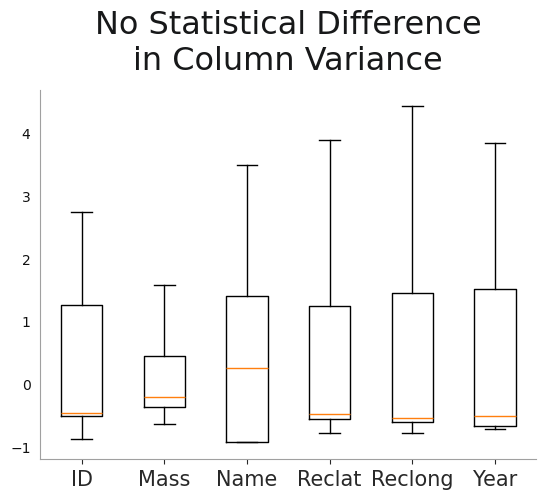

In [47]:
labels = ['ID', 'Mass', 'Name', 'Reclat', 'Reclong', 'Year']
fig, ax = plt.subplots()
ax.boxplot(columns, 0, '', labels = labels)
ax.set_title('No Statistical Difference\nin Column Variance', fontsize = 23,
			 pad = 15).set_color('#171819')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis = 'x', colors = '#282828', labelsize = 15)
ax.tick_params(axis = 'y', which = 'both', right = False,
				left = False, colors = '#101010')
plt.show();

The two-sample T-Test shows a weak difference in expected value through the small test statistic and $p = 0.026$ The two-sample F-test shows that the variability of the _id_ column is nearly identical to the variability found in the sum of the other columns with $p = 0.569$. This is also visible in the boxplot. As a result, because $p > \alpha$, specifically $0.026 > 0.01$ and $0.569 > 0.01$, we fail to reject the null hypothesis.

## Second Hypothesis

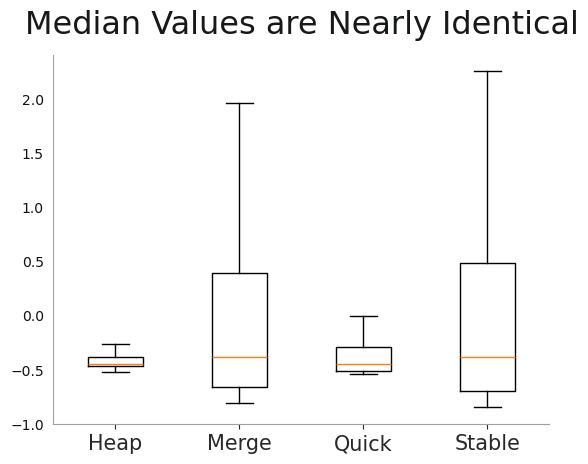

In [48]:
labels = ['Heap', 'Merge', 'Quick', 'Stable']
fig, ax = plt.subplots()
ax.boxplot(algorithms, 0, '', labels = labels)
ax.set_title('Median Values are Nearly Identical', fontsize = 23,
			 pad = 15).set_color('#171819')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis = 'x', colors = '#282828', labelsize = 15)
ax.tick_params(axis = 'y', which = 'both', right = False,
				left = False, colors = '#101010')
plt.show();

In [49]:
print(stats.ttest_ind(a = algorithms['heap'], b = heapless[0], equal_var = False, alternative = 'two-sided'))
print(pf.F_2samp_var_data(data1 = algorithms['heap'], data2 = heapless[0], alternative = 'two-sided'))

Ttest_indResult(statistic=-80.73905917892714, pvalue=0.0)
(0.04469305699047514, '0.00')


In [50]:
print(stats.ttest_ind(a = list(algorithms['merge']), b = list(mergeless[0]), equal_var = False, alternative = 'two-sided'))
print(pf.F_2samp_var_data(data1 = algorithms['merge'], data2 = mergeless[0], alternative = 'two-sided'))

Ttest_indResult(statistic=-76.76577497233419, pvalue=0.0)
(0.012511204360181608, '0.00')


In [51]:
print(stats.ttest_ind(a = list(algorithms['quick']), b = list(quickless[0]), equal_var = False, alternative = 'two-sided'))
print(pf.F_2samp_var_data(data1 = algorithms['quick'], data2 = quickless[0], alternative = 'two-sided'))

Ttest_indResult(statistic=-71.26983050685732, pvalue=0.0)
(0.015520411008218294, '0.00')


In [52]:
print(stats.ttest_ind(a = list(algorithms['stable']), b = list(stableless[0]), equal_var = False, alternative = 'two-sided'))
print(pf.F_2samp_var_data(data1 = algorithms['stable'], data2 = stableless[0], alternative = 'two-sided'))

Ttest_indResult(statistic=-77.13046123282078, pvalue=0.0)
(0.012504527633980798, '0.00')


The large test statistic and p-value $< 0.000$ for each column indicate that the mean for each column is statistically different from the other columns. Further, the variance for each column comparison is also statistically different from the other columns with a significant ratio difference at p-values $< 0.000$ Therefore, we reject the null hypothesis.